In [8]:
# GHOST - Euler Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 2

# geometry mapping degree (isoparametric)
p_geo = 1

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_L10_x_11y_11.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,10.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,10.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2, L=10.0), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p+1

# solver parameters
params = {"project_title": "euler_test_2d_p4qi",
         "problem": "compressible_euler",
         "specific_heat_ratio": 1.4,
         "numerical_flux": "roe",
         "initial_condition": "isentropic_vortex",
         "initial_vortex_centre": np.array([5.0,5.0]),
         "background_temperature": 1.0,
         "background_velocity": np.array([1.0,1.0]),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu,
         "solution_representation": "modal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 2.5,
         "time_step_scale": 0.1}

# set up solver
solver = Solver(params,mesh)
#solver.discretization.plot(plot_geometry_nodes=True, filename="../plots/quadrature_p3.pdf")

In [12]:
solver.run(write_interval=0.1)

dt =  0.0099601593625498
writing every  10  time steps, total  251
n =  10 , t =  0.09960159362549802
n =  20 , t =  0.19920318725099598
n =  30 , t =  0.2988047808764939
n =  40 , t =  0.39840637450199184
n =  50 , t =  0.49800796812748976
n =  60 , t =  0.5976095617529877
n =  70 , t =  0.6972111553784857
n =  80 , t =  0.7968127490039836
n =  90 , t =  0.8964143426294815
n =  100 , t =  0.9960159362549794
n =  110 , t =  1.0956175298804773
n =  120 , t =  1.1952191235059753
n =  130 , t =  1.2948207171314732
n =  140 , t =  1.394422310756971
n =  150 , t =  1.494023904382469
n =  160 , t =  1.593625498007967
n =  170 , t =  1.6932270916334649
n =  180 , t =  1.7928286852589628
n =  190 , t =  1.8924302788844607
n =  200 , t =  1.9920318725099586
n =  210 , t =  2.0916334661354568
n =  220 , t =  2.1912350597609547
n =  230 , t =  2.2908366533864526
n =  240 , t =  2.3904382470119505
n =  250 , t =  2.4900398406374484


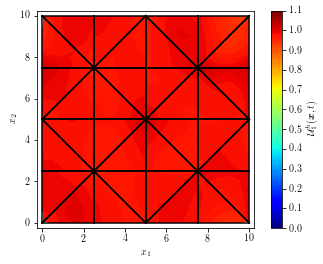

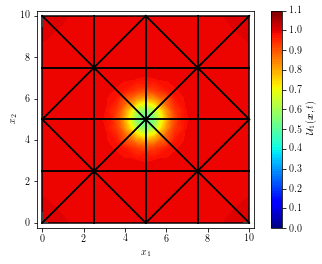

In [12]:
solver.post_process()
solver.plot(plot_numerical=True, plot_exact=True,
            plot_curves=True, plot_nodes=False, u_range=[0.0,1.1])

AttributeError: 'Solver' object has no attribute 'x_v_global'

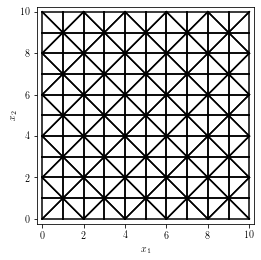

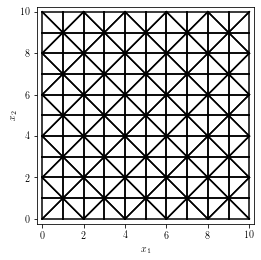

In [10]:
solver.plot_velocity_field(plot_numerical=True, plot_exact=True,
            plot_curves=True, u_range=[0,2])

In [5]:
solver.load_solution()

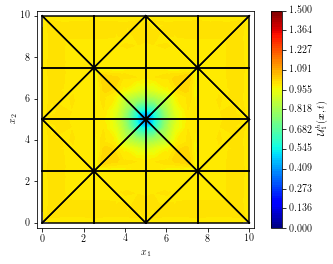

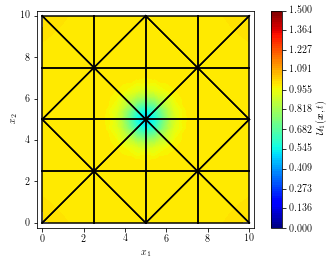

In [6]:
solver.post_process()
solver.plot(plot_numerical=True, plot_exact=True,
            plot_curves=True, plot_nodes=False, u_range=[0,1.5])

In [13]:
solver.plot_time_steps(u_range=[0.0,1.1], framerate=2)

ffmpeg -framerate 2 -i ../plots/euler_test_2d_p4qi/frame_%d.png ../plots/euler_test_2d_p4qi/video.mp4
